<a href="https://colab.research.google.com/github/Jomonjoseph25/DSA_B5_Assignments/blob/main/Case_Study_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Reading Data Set**

In [5]:
Data=pd.read_csv("/content/drive/MyDrive/Case Study 6/titanic_dataset.csv")
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Making Index PassengerID**

In [ ]:
Data_Index=Data.set_index('PassengerId')
Data_Index.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Checking Data Set**

In [ ]:
Data.shape

(891, 12)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Fill in Missing Values**

In [9]:
Filled_Data=Data.fillna(method = 'ffill')
Filled_Data=Filled_Data.fillna(method = 'bfill')
Filled_Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
Filled_Data.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Check for Outliers in Age**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


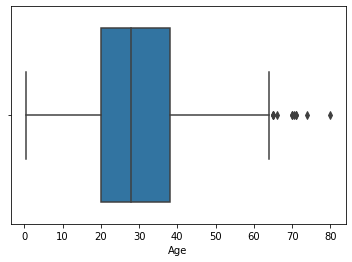

In [ ]:
sns.boxplot(Data['Age'])

In [ ]:
#Values above 65 are outliers
Q1=np.percentile(Filled_Data['Age'], 25, interpolation='midpoint')
Q2=np.percentile(Filled_Data['Age'], 50, interpolation='midpoint')
Q3=np.percentile(Filled_Data['Age'], 75, interpolation='midpoint')


In [ ]:
print(Q1)
print(Q2)
print(Q3)

20.0
28.0
38.0


In [ ]:
IQR=Q3-Q1
print(IQR)

18.0


In [ ]:
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)

-7.0
65.0


In [ ]:
outlier=[]
for x in Filled_Data['Age']:
  if((x>upper_limit) or (x<low_limit)):
    outlier.append(x)

In [ ]:
outlier

[66.0, 71.0, 70.5, 71.0, 80.0, 70.0, 70.0, 74.0]

In [ ]:
index_value=Filled_Data['Age']>upper_limit
Filled_Data.loc[index_value].index

Int64Index([33, 96, 116, 493, 630, 672, 745, 851], dtype='int64')

{'boxes': [<matplotlib.lines.Line2D at 0x7f8e6923fb10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8e69246b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e6924cb90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8e6924c650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8e692460d0>,
  <matplotlib.lines.Line2D at 0x7f8e69246610>]}

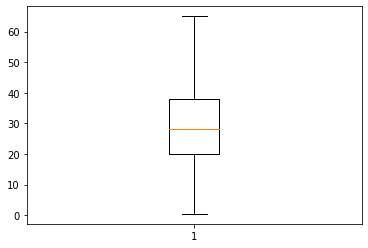

In [ ]:
Filled_Data.drop([33, 96, 116, 493, 630, 672, 745, 851], inplace=True)
plt.boxplot(Filled_Data['Age'])

**Check for Outliers in SibSp**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


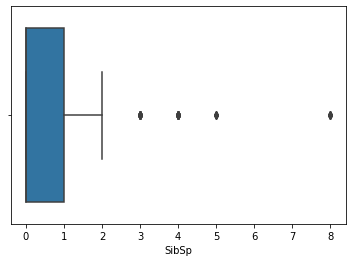

In [ ]:
sns.boxplot(Filled_Data['SibSp'])

In [ ]:
#Outliers are 3,4,5 and 8
Q1=np.percentile(Filled_Data['SibSp'], 25, interpolation='midpoint')
Q2=np.percentile(Filled_Data['SibSp'], 50, interpolation='midpoint')
Q3=np.percentile(Filled_Data['SibSp'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [ ]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)

-1.5
2.5


In [ ]:
outlier=[]
for x in Filled_Data['SibSp']:
  if((x>upper_limit) or (x<low_limit)):
    outlier.append(x)

outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [ ]:
index_value=Filled_Data['SibSp']>upper_limit
Filled_Data.loc[index_value].index

Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')

{'boxes': [<matplotlib.lines.Line2D at 0x7f8e69096150>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8e6909d210>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e69024250>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8e6909dcd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8e69096750>,
  <matplotlib.lines.Line2D at 0x7f8e69096c90>]}

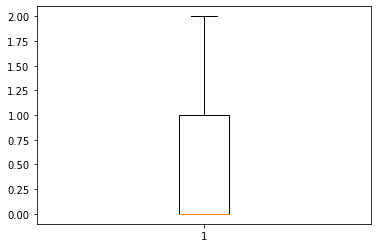

In [ ]:
Filled_Data.drop([7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863], inplace=True)
plt.boxplot(Filled_Data['SibSp'])

**Check for Outliers in Pclass**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


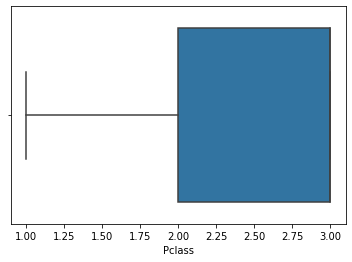

In [ ]:
sns.boxplot(Filled_Data['Pclass'])

**MIN MAX Scaling**

In [15]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

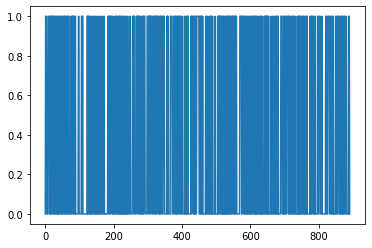

In [13]:
survived=Filled_Data.Survived
plt.plot(survived)

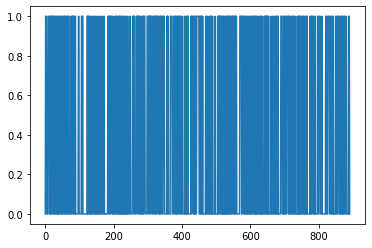

In [18]:
survived_Metrix=survived.values.reshape(-1,1)
scaled = preprocessing.MinMaxScaler()
scaled_survived=scaled.fit_transform(survived_Metrix)
plt.plot(scaled_survived)

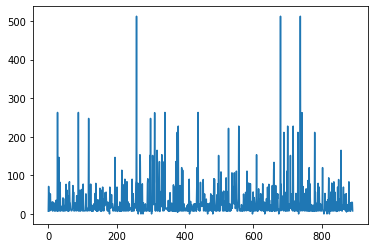

In [19]:
Fare=Filled_Data.Fare
plt.plot(Fare)

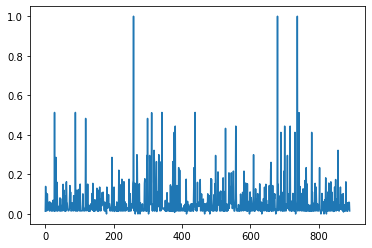

In [20]:
Fare_Metrix=Fare.values.reshape(-1,1)
scaled = preprocessing.MinMaxScaler()
scaled_Fare=scaled.fit_transform(Fare_Metrix)
plt.plot(scaled_Fare)

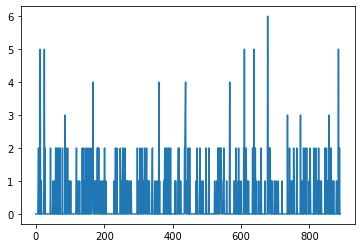

In [21]:
Parch=Filled_Data.Parch
plt.plot(Parch)

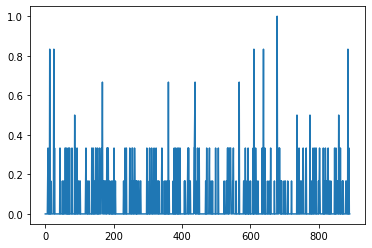

In [22]:
Parch_Metrix=Parch.values.reshape(-1,1)
scaled = preprocessing.MinMaxScaler()
scaled_Parch=scaled.fit_transform(Parch_Metrix)
plt.plot(scaled_Parch)